# Table of contents

## Summary of the project
## Imports
## Load, Explore & Clean the Data
## Most used Hashtags
## Most common languages
## Most talked about Tweets of the day

# Summary of the project
Isak Grimsson - Data 249 - 21/09/2023 

## Dataset
These are the tweets made during the E3 Nintendo event in 2018

## Goal 
Demonstrate that you understand how to use Spark SQL DataFrames, and to do some interesting data exploration

## Authors thoughts
I didn't enjoy working on databricks, I ran into a lot of practical issues that significantly slowed me down, in addition to that my workload this week was mostly focused on interview and quality gate prep, so I had limited time to work this project up to the standard I would like.

That being said, I believe I showcase the functionality of various aspect of Spark SQL Dataframes, and have done some (maybe not so) interesting data exploration

I miss pandas... I miss Jypyter notebooks...


# Imports

In [0]:
# Imports
from pyspark.sql.functions import col, sum, expr, count
from pyspark.sql.types import ArrayType, StructType

import seaborn as sns
import matplotlib.pyplot as plt


# Load, Explore & Clean the Data

In [0]:
# Load the data

# I created a sample subset to test proof of cencept with, as the main dataset is giant and slow
# df = sqlContext.read.load('dbfs:/FileStore/tables/NintendoTweetsSample.json', format='json', header=True, inferSchema=True)

# The main dataset
df = sqlContext.read.load('/FileStore/tables/nintendo_tweets.json', format='json', header=True, inferSchema=True)

In [0]:
display(df.first())

Row(contributors=None, coordinates=None, created_at='Tue Jun 12 16:00:24 +0000 2018', display_text_range=None, entities=Row(hashtags=[Row(indices=[12, 27], text='NintendoDirect')], media=None, symbols=[], urls=[], user_mentions=[]), extended_entities=None, extended_tweet=None, favorite_count=0, favorited=False, filter_level='low', geo=None, id=1006566899541598210, id_str='1006566899541598210', in_reply_to_screen_name=None, in_reply_to_status_id=None, in_reply_to_status_id_str=None, in_reply_to_user_id=None, in_reply_to_user_id_str=None, is_quote_status=False, lang='en', limit=None, place=None, possibly_sensitive=None, quote_count=0, quoted_status=None, quoted_status_id=None, quoted_status_id_str=None, quoted_status_permalink=None, reply_count=0, retweet_count=0, retweeted=False, retweeted_status=None, source='<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', text='IT BEGINS!! #NintendoDirect', timestamp_ms='1528819224616', truncated=False, user=Row(co

In [0]:
display(df.describe())

summary contributors created_at favorite_count filter_level id id_str in_reply_to_screen_name in_reply_to_status_id in_reply_to_status_id_str in_reply_to_user_id in_reply_to_user_id_str lang quote_count quoted_status_id quoted_status_id_str reply_count retweet_count source text timestamp_ms count 0 103441 103441 103441 103441 103441 3728 3327 3327 3728 3728 103441 103441 4815 4815 103441 103441 103441 103441 103441 mean null null 0.0 null 1.00657461648145446E18 1.00657461648145446E18 null 1.00644223906199462E18 1.00644223906199462E18 1.3043312213176752E17 1.3043312213176752E17 null 0.0 1.00627689622145075E18 1.00627689622145075E18 0.0 0.0 null null 1.5288210644778347E12 stddev null null 0.0 null 4.2593924349896396E12 4.2593924349896396E12 null 7.330370542812584E15 7.330370542812584E15 3.0811712054426099E17 3.0811712054426099E17 null 0.0 8.671465266992952E15 8.671465266992952E15 0.0 0.0 null null 1015518.2889340734 min null Tue Jun 12 16:00:24 +0000 2018 0 low 1006566899541598210 1006566899541598210 0DanSmith 583756785019826177 1005497078980710402 608663 1000853122540072962 ar 0 477159484607852544 1001884997798846464 0 0 Twitch Hashtag ! #NintendoE3 1528819224616 max null Tue Jun 12 17:00:23 +0000 2018 0 low 1006581995546161153 1006581995546161153 zachwb 1006581818429267973 583756785019826177 1006537791503675392 997111977699786752 zh 0 1006581697981317120 973274075580821510 0 0 Twit_Side 🧡🧡🧡🧡 https://t.co/wVYiTndxAB 1528822823784

In [0]:
# Drop the columns that have nothing but missing values
df = df.drop("contributors", "favorite_count", "coordinates","geo","quote_count","reply_count","retweet_count")
# Drop duplicate tables
df = df.drop("id_str","in_reply_to_status_id_str","in_reply_to_user_id_str","quoted_status_id_str","in_reply_to_screen_name")
# Drop irrelevant tables
df = df.drop("created_at","filter_level")

display(df.describe())

summary id in_reply_to_status_id in_reply_to_user_id lang quoted_status_id source text timestamp_ms count 103441 3327 3728 103441 4815 103441 103441 103441 mean 1.00657461648145446E18 1.00644223906199462E18 1.3043312213176752E17 null 1.00627689622145075E18 null null 1.5288210644778347E12 stddev 4.2593924349896396E12 7.330370542812584E15 3.0811712054426099E17 null 8.671465266992952E15 null null 1015518.2889340734 min 1006566899541598210 583756785019826177 608663 ar 477159484607852544 Twitch Hashtag ! #NintendoE3 1528819224616 max 1006581995546161153 1006581818429267973 1006537791503675392 zh 1006581697981317120 Twit_Side 🧡🧡🧡🧡 https://t.co/wVYiTndxAB 1528822823784

In [0]:
display(df.describe())

summary id in_reply_to_status_id in_reply_to_user_id lang quoted_status_id source text timestamp_ms count 103441 3327 3728 103441 4815 103441 103441 103441 mean 1.00657461648145446E18 1.00644223906199462E18 1.3043312213176752E17 null 1.00627689622145075E18 null null 1.5288210644778347E12 stddev 4.2593924349896396E12 7.330370542812584E15 3.0811712054426099E17 null 8.671465266992952E15 null null 1015518.2889340734 min 1006566899541598210 583756785019826177 608663 ar 477159484607852544 Twitch Hashtag ! #NintendoE3 1528819224616 max 1006581995546161153 1006581818429267973 1006537791503675392 zh 1006581697981317120 Twit_Side 🧡🧡🧡🧡 https://t.co/wVYiTndxAB 1528822823784

In [0]:
# Delete duplicates

# calculations skipped to speed up the code (it was 93 I belive)
# print("duplicates before deletion:",df.count()-df.distinct().count())
df = df.dropDuplicates()
# print("duplicates after deletion:",df.count()-df.distinct().count())

In [0]:
# Check for missing values
missing_value_counts = df.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
display(missing_value_counts)

display_text_range entities extended_entities extended_tweet favorited id in_reply_to_status_id in_reply_to_user_id is_quote_status lang limit place possibly_sensitive quoted_status quoted_status_id quoted_status_permalink retweeted retweeted_status source text timestamp_ms truncated user 94066 1254 76034 99500 1254 1254 101281 100880 1254 1254 103351 103039 68610 99793 99793 99793 1254 58388 1254 1254 1254 1254 1254

In [0]:
# drop the 1254 problematic rows
df = df.filter(df["id"].isNotNull())
missing_value_counts = df.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
display(missing_value_counts)

display_text_range entities extended_entities extended_tweet favorited id in_reply_to_status_id in_reply_to_user_id is_quote_status lang limit place possibly_sensitive quoted_status quoted_status_id quoted_status_permalink retweeted retweeted_status source text timestamp_ms truncated user 92812 0 74780 98246 0 0 100027 99626 0 0 103351 101785 67356 98539 98539 98539 0 57134 0 0 0 0 0

In [0]:
# Look at the columns that have missing values

missing_value_counts = df.agg(*[sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
columns_with_missing_values = [column for column in missing_value_counts.columns if missing_value_counts.select(column).agg({"*": "sum"}).collect()[0][0] > 0]
display(missing_value_counts.select(*columns_with_missing_values))

display_text_range extended_entities extended_tweet in_reply_to_status_id in_reply_to_user_id limit place possibly_sensitive quoted_status quoted_status_id quoted_status_permalink retweeted_status 92812 74780 98246 100027 99626 103351 101785 67356 98539 98539 98539 57134

In [0]:
# And look at the columns that don't have any missing values

columns_with_no_missing_values = [column for column in missing_value_counts.columns if missing_value_counts.select(column).agg({"*": "sum"}).collect()[0][0] == 0]
display(missing_value_counts.select(*columns_with_no_missing_values))

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-1631653703236182>:3
      1 # And look at the columns that don't have any missing values
----> 3 columns_with_no_missing_values = [column for column in missing_value_counts.columns if missing_value_counts.select(column).agg({"*": "sum"}).collect()[0][0] == 0]
      4 display(missing_value_counts.select(*columns_with_no_missing_values))

NameError: name 'missing_value_counts' is not defined

In [0]:
display(df.describe())

summary id in_reply_to_status_id in_reply_to_user_id lang quoted_status_id source text timestamp_ms count 103351 3324 3725 103351 4812 103351 103351 103351 mean 1.00657461618397862E18 1.00644212393337907E18 1.3034703561830904E17 null 1.0062767126076841E18 null null 1.5288210644069282E12 stddev 4.259519552280692E12 7.333677718219261E15 3.0807901917602317E17 null 8.674165362921667E15 null null 1015548.59939327 min 1006566899541598210 583756785019826177 608663 ar 477159484607852544 Twitch Hashtag ! #NintendoE3 1528819224616 max 1006581995546161153 1006581818429267973 1006537791503675392 zh 1006581697981317120 Twit_Side 🧡🧡🧡🧡 https://t.co/wVYiTndxAB 1528822823784


# Most used Hashtags


In [0]:
# Investigate what the hashtags look like
df.createOrReplaceTempView("my_table")
sql_query = spark.sql("SELECT entities.hashtags, COUNT(*) AS frequency FROM my_table GROUP BY entities.hashtags ORDER BY frequency DESC")
display(sql_query)

hashtags frequency List() 9922 List(List(List(0, 11), NintendoE3)) 2704 List(List(List(106, 116), SmashBros)) 2268 List(List(List(47, 58), NintendoE3)) 1388 List(List(List(100, 103), E3), List(List(104, 115), NintendoE3)) 1057 List(List(List(45, 55), SmashBros), List(List(67, 82), NintendoSwitch), List(List(85, 96), NintendoE3), List(List(97, 104), E32018)) 913 List(List(List(20, 31), FireEmblem), List(List(59, 74), NintendoSwitch), List(List(93, 104), NintendoE3)) 755 List(List(List(102, 117), NintendoDirect)) 693 List(List(List(14, 25), NintendoE3)) 551 List(List(List(58, 68), SmashBros), List(List(81, 96), NintendoSwitch), List(List(120, 131), NintendoE3)) 531 List(List(List(48, 55), E32018), List(List(56, 67), NintendoE3)) 527 List(List(List(24, 31), E32018), List(List(32, 43), NintendoE3)) 507 List(List(List(20, 30), SmashBros), List(List(113, 124), NintendoE3), List(List(125, 132), E32018)) 507 List(List(List(23, 34), NintendoE3)) 503 List(List(List(18, 29), NintendoE3)) 487 List(List(List(72, 79), E32018), List(List(80, 91), NintendoE3)) 485 List(List(List(55, 62), E32018), List(List(63, 74), NintendoE3)) 462 List(List(List(37, 48), NintendoE3)) 462 List(List(List(49, 60), NintendoE3), List(List(61, 68), E32018)) 454 List(List(List(110, 120), SmashBros), List(List(121, 132), NintendoE3)) 450 List(List(List(29, 40), NintendoE3)) 440 List(List(List(16, 27), FireEmblem), List(List(55, 70), NintendoSwitch), List(List(91, 102), NintendoE3)) 423 List(List(List(41, 52), NintendoE3)) 419 List(List(List(17, 28), NintendoE3)) 418 List(List(List(16, 27), NintendoE3)) 415 List(List(List(21, 32), NintendoE3)) 412 List(List(List(36, 47), NintendoE3)) 398 List(List(List(20, 31), NintendoE3)) 393 List(List(List(73, 84), NintendoE3)) 391 List(List(List(27, 38), NintendoE3)) 386 List(List(List(100, 109), Splatoon), List(List(110, 121), NintendoE3)) 376 List(List(List(28, 39), NintendoE3)) 370 List(List(List(34, 45), NintendoE3)) 362 List(List(List(26, 37), NintendoE3)) 360 List(List(List(57, 68), NintendoE3)) 355 List(List(List(65, 76), NintendoE3)) 354 List(List(List(32, 43), NintendoE3)) 354 List(List(List(30, 41), NintendoE3)) 351 List(List(List(19, 30), NintendoE3)) 351 List(List(List(26, 36), SmashBros), List(List(55, 70), NintendoSwitch), List(List(81, 92), NintendoE3)) 346 List(List(List(33, 44), NintendoE3)) 345 List(List(List(42, 53), NintendoE3)) 344 List(List(List(38, 49), NintendoE3)) 341 List(List(List(39, 50), NintendoE3)) 340 List(List(List(15, 26), NintendoE3)) 337 List(List(List(25, 36), NintendoE3)) 337 List(List(List(50, 61), NintendoE3)) 332 List(List(List(40, 51), NintendoE3)) 329 List(List(List(35, 46), NintendoE3)) 329 List(List(List(12, 23), NintendoE3)) 325 List(List(List(24, 35), NintendoE3)) 321 List(List(List(13, 24), NintendoE3)) 320 List(List(List(22, 33), NintendoE3)) 319 List(List(List(43, 54), NintendoE3)) 312 List(List(List(40, 47), E32018), List(List(48, 59), NintendoE3)) 307 List(List(List(46, 57), NintendoE3)) 306 List(List(List(48, 59), NintendoE3)) 303 List(List(List(31, 42), NintendoE3)) 296 List(List(List(42, 49), E32018), List(List(50, 61), NintendoE3)) 286 List(List(List(95, 105), SmashBros), List(List(120, 135), NintendoSwitch)) 279 List(List(List(68, 89), XenobladeChronicles2)) 274 List(List(List(53, 64), NintendoE3)) 274 List(List(List(0, 15), NintendoDirect)) 273 List(List(List(45, 56), NintendoE3)) 272 List(List(List(93, 100), E32018), List(List(101, 112), NintendoE3)) 259 List(List(List(11, 22), NintendoE3)) 255 List(List(List(0, 7), E32018), List(List(8, 19), NintendoE3)) 253 List(List(List(58, 69), NintendoE3)) 253 List(List(List(104, 114), SmashBros)) 251 List(List(List(54, 65), NintendoE3)) 249 List(List(List(53, 64), NintendoE3), List(List(65, 72), E32018), List(List(73, 84), GameSpotE3)) 244 List(List(List(44, 55), NintendoE3)) 233 List(List(List(39, 50), NintendoE3), List(List(51, 58), E32018)) 226 List(List(List(70, 81), NintendoE3), List(List(82, 93), GameSpotE3), List(List(94, 11

we are not really interested in the indices of the hashtags, so we'll ignore that for this query


In [0]:
sql_query = spark.sql("SELECT entities.hashtags.text, COUNT(*) AS frequency FROM my_table WHERE size(entities.hashtags.text) > 0 GROUP BY entities.hashtags.text ORDER BY frequency DESC LIMIT 10")
display(sql_query)

text frequency List(NintendoE3) 28497 List(E32018, NintendoE3) 8454 List(NintendoE3, E32018) 6153 List(NintendoDirect) 4617 List(SmashBros) 2925 List(E32018, NintendoDirect) 2312 List(E3, NintendoE3) 2312 List(SmashBros, NintendoSwitch, NintendoE3) 2092 List(FireEmblem, NintendoSwitch, NintendoE3) 1555 List(NintendoDirect, E32018) 1428

# Most common languages

In [0]:
sql_query = spark.sql("SELECT lang, COUNT(*) AS frequency FROM my_table WHERE lang IS NOT NULL GROUP BY lang ORDER BY frequency DESC LIMIT 10")
display(sql_query)

lang frequency en 71378 es 10768 fr 7483 und 3031 de 2962 ja 2472 pt 1172 in 552 no 524 it 436

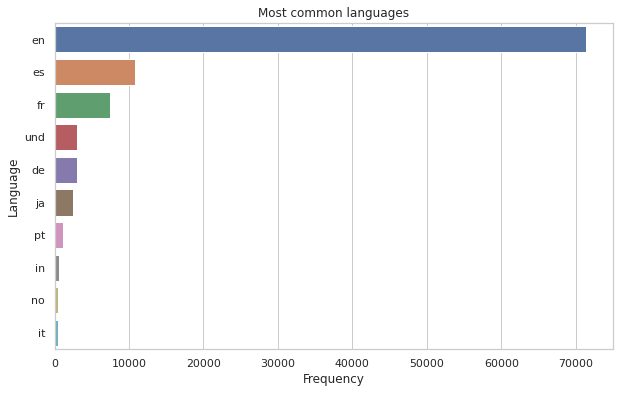

In [0]:
pd_df = sql_query.toPandas()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x="frequency", y="lang", data=pd_df)

plt.xlabel("Frequency")
plt.ylabel("Language")
plt.title("Most common languages")

plt.show()

# Most talked about Tweets of the day

In [0]:
filtered_df = df.filter(col("quoted_status.extended_tweet.full_text").isNotNull())
result_df = filtered_df.groupBy("quoted_status.extended_tweet.full_text").agg(count("*").alias("frequency"))
result_df = result_df.orderBy(col("frequency").desc()).limit(10)
display(result_df)

full_text frequency Everyone is here! Every fighter in the series' history is joining the battle in Super #SmashBros Ultimate on #NintendoSwitch! #NintendoE3 https://t.co/PzvAsHVWcr 337 Super #SmashBros roster revealed, featuring Snake and every fighter in history joining the battle! #NintendoE3 #E32018 #GameSpotE3 https://t.co/OhCVHPFZzo 97 Echo Fighters are fighters who are based on another fighter. Introducing a brand new Echo Fighter: Daisy! She fights like Peach, but they have different characteristics. #SmashBros #NintendoE3 https://t.co/kqar4vreP7 59 Get off the Battle Bus and enjoy the complete Battle Royale experience in #Fortnite, available later today on #NintendoSwitch #eShop! #NintendoE3 https://t.co/OLXZklhtAs 52 Ils sont de retour, plus déterminés que jamais ! Tous les combattants de la série seront présents dans Super #SmashBros Ultimate sur #NintendoSwitch ! #NintendoE3 https://t.co/VKwKdFC4Yh 52 Everyone is here! Every fighter in the series' history is joining the battle in Super #SmashBros Ultimate on #NintendoSwitch! #NintendoE3 https://t.co/lPjSnFcVw2 50 Get off the Battle Bus and enjoy the complete Battle Royale experience in #Fortnite, available later today on #NintendoSwitch #eShop! #NintendoE3 https://t.co/1VM6JZmhXb 42 ¡No falta nadie! ¡Todos los luchadores de la serie se unen al combate en Super #SmashBros Ultimate para #NintendoSwitch! #NintendoE3 https://t.co/AJDF3JURG9 36 The rumors were true! Dance your way to a Victory Royale on the Nintendo Switch version of #Fortnite TODAY! #NintendoE3 #E32018 #GameStopE3 https://t.co/Xci2sieSzZ 32 Salta del autobús de batalla y disfruta de la completa experiencia Battle Royale de #Fortnite, disponible hoy en #eShop de #NintendoSwitch. #NintendoE3 https://t.co/Ys0meAqnRo 26